In [75]:
import pandas as pd
from PreProcessing import *
from FeatureExtraction import *
import matplotlib.pyplot as plt
import os
import pickle as pkl

rate = 25600

def load_df(pkz_file):
    with open(pkz_file, 'rb') as f:
        df=pd.read_pickle(f)
    return df

def process(df, out_file):
  with open(out_file, 'wb') as pfile:
    pkl.dump(df, pfile)

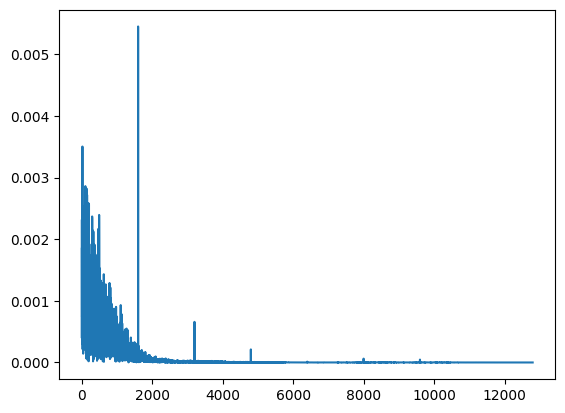

In [73]:
df = load_df('Files/h_1.pkz')
freq, env = pre_processing(df.values)
plt.plot(freq, env)

In [22]:
path = 'Files/'
files = os.listdir(path)
data = []
for item in files:
    df = load_df(path+item)
    data.append(df.values)

In [ ]:
i, env0, features = 0, 0, []

while(i < len(data)):
    freq, env = pre_processing(data[i])
    if i == 0:
        env0 = env

    energy = envelope_band_energy(env, freq, parts=5)
    rs = related_similarity(env0, env)
    features.append([energy[0],rs])
    i = i+1    

In [74]:
df1 = pd.DataFrame(features)
df1.columns = [f'ENERGY_{i}' for i in range(len(features[0])-1)] + ['RS']